# Create boxdata
* Input: label data
* Output: numpy array CT iamge and label (pancreas, lesion)

In [1]:
import time
import os, glob, ntpath
import logging
from tqdm import tqdm_notebook as tqdm
import numpy as np
import pandas as pd
import pydicom as dicom
import nrrd
import matplotlib.pyplot as plt
from datetime import datetime as ddt

In [2]:
from create_boxdata import create_boxdata, create_AD_boxdata

/home/u/sonic81518/.conda/envs/tinghui/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
border = np.array([0, 0, 0])
# box_save_path = '/home/d/pancreas/resample115_box_data/'
box_save_path = '/home/d/pancreas/test/'

In [4]:
sortkey = lambda k: ntpath.basename(k).replace('.dcm', '').split('-')[-1]
sortkey_PC = lambda k: int(ntpath.basename(k).replace('.dcm', '').split('I')[-1])

# Usage
To view one simple case, just simply run `create_box_data`. It will return the numpy array of image and labels. <br>
For NP and PT, please input **sortkey**; for PC, please input **sortkey_PC**.

In [7]:
image, label = create_boxdata('/home/d/pancreas/label_data/000027/PC67/', sortkey_PC)

In [8]:
print('Image shape:', image.shape)
print('Number of content in label:', len(label))
print('Total label name:')
for item in label:
    print(' ', item[0], ':', item[1].shape)

Image shape: (110, 58, 14)
Number of content in label: 3
Total label name:
  pancreas : (110, 58, 14)
  lesion : (110, 58, 14)
  pduct : (110, 58, 14)


In [10]:
data_path = '/home/u/sonic81518/C3L-00189/'

In [11]:
sortkey = lambda k: ntpath.basename(k).split('.')[0]

In [17]:
create_boxdata(data_path, sortkey, box_save_path=box_save_path, change_spacing=False)

(array([[[ -94,   45, -122, ..., -129,   94,  -53],
         [-115,   58, -134, ..., -128,   74,  -39],
         [ -97,   60, -144, ..., -128,   83,   -4],
         ...,
         [ 121, -731,  -87, ...,    5,  135,  -27],
         [ 133, -746,  -81, ...,  -45,  163,  -27],
         [ 113, -744,  -52, ...,  -35,  144,  -45]],
 
        [[-103,   50, -137, ..., -129,  103,  -51],
         [-124,   78, -133, ..., -129,  102,  -29],
         [ -97,   76, -134, ..., -102,   87,    1],
         ...,
         [ 119, -752,  -95, ...,  -50,  129,   16],
         [ 134, -753,  -93, ...,  -61,  144,   23],
         [ 145, -748,  -63, ...,  -41,  130,  -10]],
 
        [[ -97,   64, -140, ..., -105,   91,  -27],
         [-112,   77, -129, ..., -116,   98,    1],
         [ -78,   78, -120, ...,  -90,   81,   10],
         ...,
         [ 119, -755, -108, ...,  -55,  151,   13],
         [ 126, -743,  -88, ...,  -57,  132,    5],
         [ 155, -726,  -79, ...,  -44,  124,  -29]],
 
        ...,


# Create box data and save as numpy array

In [5]:
st_tol = time.time()
cnt = 0
for tumorpath in tqdm(glob.glob('/home/d/pancreas/label_data/*/PT*/*nrrd')):
    create_boxdata(tumorpath.replace('/label.nrrd','/'), sortkey, box_save_path=box_save_path, fine_to_thick=True, change_spacing=True)
    cnt += 1
print('Done create {} box data in {} seconds'.format(cnt, time.time()-st_tol))

HBox(children=(IntProgress(value=0, max=44), HTML(value='')))

/home/u/sonic81518/.conda/envs/tinghui/lib/python3.6/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)



Done create 44 box data in 87.85057210922241 seconds


In [153]:
st_tol = time.time()
cnt = 0
for tumorpath in tqdm(glob.glob('/home/d/pancreas/label_data/*/NP*/*nrrd')):
    create_boxdata(tumorpath.replace('/label.nrrd','/'), sortkey, box_save_path=box_save_path, fine_to_thick=True, change_spacing=True)
    cnt += 1
print('Done create {} box data in {} seconds'.format(cnt, time.time()-st_tol))

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))


Done create 10 box data in 6.057265520095825 seconds


In [7]:
st_tol = time.time()
cnt = 0
for tumorpath in tqdm(glob.glob('/home/d/pancreas/label_data/*/PC*/*nrrd')):
    try:
        create_boxdata(tumorpath.replace('/label.nrrd','/'), sortkey_PC, change_spacing=True, box_save_path=box_save_path)
        cnt += 1
    except:
        print(tumorpath)
print('Done create {} box data in {} seconds'.format(cnt, time.time()-st_tol))

HBox(children=(IntProgress(value=0, max=104), HTML(value='')))

/home/u/sonic81518/.conda/envs/tinghui/lib/python3.6/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)



Done create 104 box data in 45.17852425575256 seconds


In [8]:
st_tol = time.time()
cnt = 0
for tumorpath in tqdm(glob.glob('/home/d/pancreas/no_label_data/AD*/')):
    try:
        create_AD_boxdata(tumorpath.replace('/label.nrrd','/'), sortkey, box_save_path=box_save_path, fine_to_thick=True, change_spacing=True)
        cnt += 1
    except:
        print(tumorpath)
print('Done create {} box data in {} seconds'.format(cnt, time.time()-st_tol))

HBox(children=(IntProgress(value=0, max=92), HTML(value='')))

/home/u/sonic81518/.conda/envs/tinghui/lib/python3.6/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)



Done create 92 box data in 1028.5098505020142 seconds


In [9]:
for tumorpath in tqdm(glob.glob('/home/d/pancreas/no_label_data/AD*/')):
    ID = tumorpath.split('/')[-2]
    img, lbl = create_AD_boxdata(tumorpath.replace('/label.nrrd', '/'), sortkey, new_spacing=[1, 1, 1])
    image = nib.Nifti1Image(img, affine)
    image.to_filename('/home/d/pancreas/box_nifti/' + ID + 'img.nii.gz')
    label = nib.Nifti1Image(lbl, affine)
    label.to_filename('/home/d/pancreas/box_nifti/' + ID + 'lbl.nii.gz')

HBox(children=(IntProgress(value=0, max=92), HTML(value='')))

/home/u/sonic81518/.conda/envs/tinghui/lib/python3.6/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


# Special: for the AD drawing by Dr. Chen

In [64]:
border = np.array([0, 0, 0])
change_spacing = True
new_spacing = [1, 1, 5]
fine_to_thick = False

In [12]:
import nibabel as nib
from checking import refine_dcm
from preprocessing import get_pixels_hu, resample, find_largest
from create_boxdata import standard_filename, get_dicominfo

In [13]:
import nrrd

In [131]:
tumor_id = 'AD105'

In [132]:
imagefile = nib.load('/home/d/pancreas/no_label_data/' + tumor_id + '/' + tumor_id + 'img_55.nii.gz')

In [133]:
image = imagefile.get_data()
img_spacing = np.diag(imagefile.affine)[:3]
img_origin = imagefile.affine[:, -1][:3]

In [134]:
tumor_label, tumor_options = nrrd.read('/home/d/pancreas/no_label_data/' + tumor_id + '/' + tumor_id + '.seg.nrrd')

In [135]:
label_shape = np.array(tumor_label.shape[1:]) \
    if len(tumor_label.shape) == 4 else np.array(tumor_label.shape)

seg_origin = np.array(tumor_options['space origin'], dtype=float)
if np.all(np.isnan(tumor_options['space directions'][0])):
    seg_spacing = np.diag(np.array(tumor_options['space directions'][1:])
                          .astype(float))
else:
    seg_spacing = np.diag(np.array(tumor_options['space directions'])
                          .astype(float))

In [136]:
seg_origin_idx = np.round((seg_origin / seg_spacing -
                           img_origin / img_spacing)).astype(int)

In [137]:
box_origin_idx = seg_origin_idx - border
box_length = label_shape + 2 * border

x_orgidx, y_orgidx, z_orgidx = box_origin_idx
x_len, y_len, z_len = box_length
x_border, y_border, z_border = border

crop_img = image[x_orgidx: x_orgidx+x_len, y_orgidx: y_orgidx+y_len, z_orgidx: z_orgidx+z_len]

In [138]:
if change_spacing:
    crop_img, _ = resample(crop_img, abs(img_spacing), new_spacing)

In [139]:
category_cnt = tumor_label.shape[0] \
    if tumor_options['dimension'] == 4 else 1
category_names = [tumor_options['Segment{}_Name'.format(c)]
                  for c in range(category_cnt)]
label = []
for i, category_name in enumerate(category_names):
    category_label = np.zeros(box_length)
    if len(tumor_label.shape) == 4:
        category_label[x_border: x_len-x_border,
                       y_border: y_len-y_border,
                       z_border: z_len-z_border] = tumor_label[i]
    else:
        category_label[x_border: x_len-x_border,
                       y_border: y_len-y_border,
                       z_border: z_len-z_border] = tumor_label

    if change_spacing:
        category_label, _ = resample(category_label,
                                     abs(img_spacing), new_spacing)
    elif fine_to_thick:
        category_label = finecut_to_thickcut(
            category_label, thickness, label_mode=True)
    save_name = standard_filename(category_name)
    label.append([save_name, category_label])

In [140]:
base_tumor_path = box_save_path + tumor_id + '/'
if not os.path.exists(base_tumor_path):
    os.mkdir(base_tumor_path)
np.save(base_tumor_path + 'ctscan.npy', crop_img)

for item in label:
    np.save(base_tumor_path + item[0] + '.npy', item[1])

In [141]:
pancreas = np.load('/home/d/pancreas/test_box_data/' + tumor_id + '/pancreas.npy')
image = np.load('/home/d/pancreas/test_box_data/' + tumor_id + '/ctscan.npy')

In [142]:
print(pancreas.shape, image.shape)

(123, 74, 10) (123, 74, 10)


In [ ]:
glob.glob('/home/d/pancreas/')

In [18]:
import numpy as np

In [19]:
image = np.load('/home/d/pancreas/box_data/PC67/ctscan.npy')

In [20]:
image.shape

(162, 85, 14)

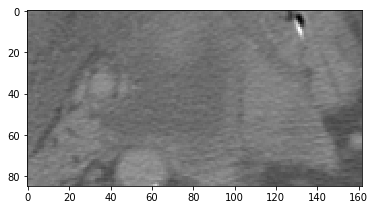

In [23]:
plt.imshow(image[:,:,5].T, cmap='gray')

In [24]:
pancreas = np.load('/home/d/pancreas/box_data/PC67/pancreas.npy')

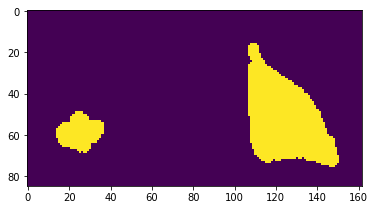

In [26]:
plt.imshow(pancreas[:,:,5].T)